**Project Documentation**: Using Dental Metrics to Predict Gender

**Objective**:
The goal of this project is to predict the gender (male or female) of individuals using dental metrics such as inter-canine distances and other oral measurements. We will use various machine learning algorithms and evaluate their performance to choose the best model.

In [6]:
pip install xgboost

**Step 1: Importing Necessary Libraries**

In [7]:
# As problem falls into classification machine learning lets import required libraries
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer

# For building classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# For scaling data (if needed)
from sklearn.preprocessing import StandardScaler

# For handling imbalanced data (if applicable)
from imblearn.over_sampling import SMOTE

**Step 2: Import the Dataset**

In [8]:
# importing the dataset
df = pd.read_csv("Dentistry Dataset.csv")

In [9]:
# Loading the dataset
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


**Step 3: Data Preprocessing**

In [10]:
# checking shape of dataset
df.shape

(1100, 14)

In [11]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [12]:
# Checking for missing values
df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [13]:
# Lets drop the column sample id as all value are missing
# Dropping the 'SampleID' column from the dataframe
df = df.drop('Sample ID', axis=1)

# Display the first few rows to confirm the column is dropped
df.head()

,Sl No,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [14]:
#Since the target variable "Gender" is categorical, we need to encode it.
# Encoding 'Gender' (the target variable)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # 0 for female, 1 for male

In [15]:
df.head()

,Sl No,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [16]:
# Splitting independent (X) and dependent variables (Y)
# Dropping 'SampleID' and 'SL No.' as they are irrelevant for model building
X = df.drop(['Gender', 'Sl No'], axis=1)
y = df['Gender']

In [17]:
# Normalize the features
normalizer = Normalizer()
X = normalizer.fit_transform(X)

**Step 4: Exploratory Data Analysis (EDA)**

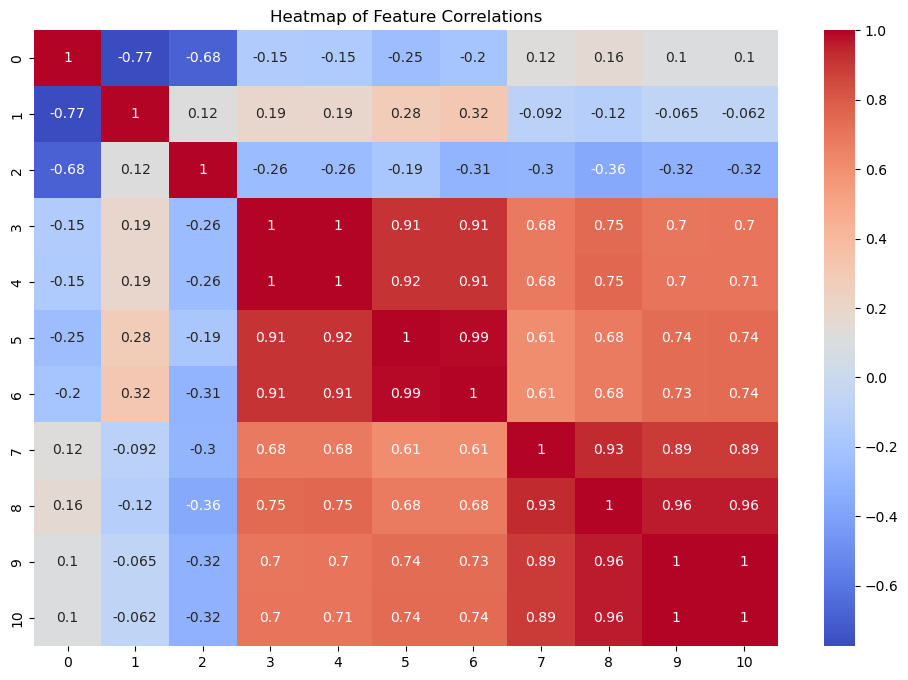

In [18]:
# Correlation heatmap to check for multicollinearity
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

**Step 5: Model Building**

In [63]:
# Splitting the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

**Step 6: Model Evaluation**

In [75]:
# Confusion Matrix and Accuracy for each model

# Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

# Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))

# XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.6636363636363637
Confusion Matrix:
 [[66 47]
 [27 80]]
Decision Tree Accuracy: 0.8636363636363636
Confusion Matrix:
 [[93 20]
 [10 97]]
Random Forest Accuracy: 0.8954545454545455
Confusion Matrix:
 [[105   8]
 [ 15  92]]
XGBoost Accuracy: 0.8909090909090909
Confusion Matrix:
 [[101  12]
 [ 12  95]]


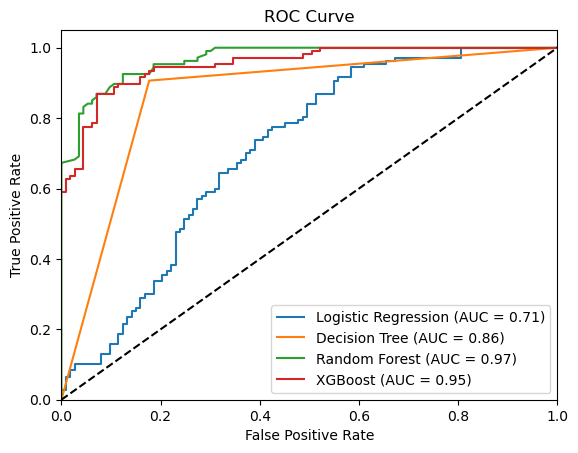

In [77]:
# ROC and AUC Curves

# Logistic Regression ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')

# Decision Tree ROC Curve
fpr, tpr, _ = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')

# Random Forest ROC Curve
fpr, tpr, _ = roc_curve(y_test, forest.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# XGBoost ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

As from the above plot Random Forest has high accuracy hence choosing it and saving the model

**Step 7: Save the Best Model**

In [81]:
import pickle

# Random Forest is the best model, save it
best_model = forest

# Save the model to disk
filename = 'best_model_forest.pkl'
pickle.dump(best_model, open(filename, 'wb'))

**Step 8: Load the Saved Model**

In [84]:
# Load the saved model from the disk
filename = 'best_model_forest.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [86]:
# Replacing X_test with actual input data for prediction
predictions = loaded_model.predict(X_test)

# Output of the predictions
print(predictions)

[0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1]


**Step 9: Conclusion**

In this model building project all the models were successfully built. The best model choose with high accuracy is Random Forest and hence the model is saved.